# Tensors for Beginners

These are my notes, taken from watching the highly recommended video series "Tensors For Beginners" bei eigenchris:    
https://www.youtube.com/watch?v=8ptMTLzV4-I&list=PLJHszsWbB6hrkmmq57lX8BV-o-YIOFsiG  

## -1: Motivation
https://www.youtube.com/watch?v=8ptMTLzV4-I  

Tensors are required in many physical theories - for example to describe the curvature of spacetime in general relativity, state vectors in quantum mechanics (combined states of entangled systems are defined by a tensor product).  

Remark:  
They are also very important in continuum mechanics to describe, how materials deform under forces, i.e. how they respond to stress with strain (Chris doesn't mention this).

## 0: Tensor Definition
https://www.youtube.com/watch?v=TvxmkZmBa-k  

A tensor may defined in various ways:  

- Array definition: a tensor is a multi-dimensional array of numbers
 - Rank 0: a scalar, zero dimensions, no index to run over
 - Rank 1: a vector, one dimension, 1 index to run over
 - Rank 2: a matrix, two dimensional grid of numbers, 2 indices (row and column)
 - Rank 3: a sort of cube/block in space
 - and so on (next maybe a set of blocks, then a set of sets of blocks, ..)
 - that's actually a wrong definition: tensors can be *represented* as multi-dimensional arrays (after a basis has been chosen), but their fundamental nature is geometric and is independent from an (arbitrary) basis
 - Remark: i think, tensors are always represented as hypercubic arrays (the different indices have all the same range), so a multidimensional array is actually a more general data structure
    
    
- Coordinate definition: a tensor is an object that is invariant under a change of coordinates and has components that change in a special, predictable way under a change of coordinates
 - the distance between two points does not depend on the choice of the coordinate system
 - the position of a point or the direction of a vector doesn't either
 - vectors are invariant but their components are not
  
  
- Abstract definition: a tensor is a collection of vectors and covectors combined together using the tensor product
  

- Extra: tensors as partial derivatives and gradients that transform with the Jacobian matrix (later, in the Tensor Calculus series, this will be explained)
 

## 1: Forward & Backward Transformations
https://www.youtube.com/watch?v=sdCmW5N1LW4  

Forward and backward transformations are the rules that let us switch between two coordinate systems. We represent our tensors as numpy arrays. We start by defining our old basis vectors $\vec{e_1}, \vec{e_2}$   and new basis vectors $\tilde{\vec{e_1}}, \tilde{\vec{e_2}}$ and plotting them:

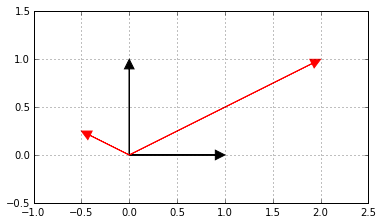

In [79]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

e1  = np.array([1, 0])      # 1st basis vector in old basis
e2  = np.array([0, 1])      # 2nd basis vector in old basis
et1 = np.array([2, 1])      # 1st new basis vector (t for tilde)
et2 = np.array([-1/2, 1/4]) # 2nd new basis vector

def plotVector(v, color='k'):
    # todo: have an optional start point (also a vector), so we can draw
    # vector sums (tip-to tail)
    ax = plt.axes()
    ax.arrow(0,0,v[0],v[1],head_width=0.1,head_length=0.1,
             color=color, length_includes_head=True)
    
def plotVectors(vecs, color='k'):
    for v in vecs:
        plotVector(v, color=color)

plt.xlim(-1,2.5)    
plt.ylim(-0.5,1.5) 
plotVectors([e1,  e2],  'k')
plotVectors([et1, et2], 'r')
plt.grid(which='major')
plt.axes().set_aspect('equal')
plt.show()

We define a function that takes two vectors as inputs and creates a matrix from them by writing the vectors as columns into the matrix. Then we use that function to define the forward transform matrix $F$ and we also define the backward transform matrix $B$. Note that the matrix given in the video above is wrong (transposed) - chris corrected himslef later in a follow up video (https://www.youtube.com/watch?v=ipRrCPvftTk). 

In [39]:
def vecs2mat(col1, col2):
    return np.matrix([ [col1[0], col2[0]], [col1[1], col2[1]] ])

F = vecs2mat(et1, et2)              # forward transform matrix
B = np.matrix([[1/4, 1/2],[-1, 2]]) # backward transform matrix
print(F); print(B)

[[ 2.   -0.5 ]
 [ 1.    0.25]]
[[ 0.25  0.5 ]
 [-1.    2.  ]]


The columns of the forward transform matrix $F$ are the vectors onto which the 1st and 2nd unit vector $(1, 0)^T$ and $(0, 1)^T$ get mapped, which happen to coincide with our first basis vectors (i.e. our first basis was chosen to be the canonical basis of $\mathbb{R}^2$). 
<!--
But that doesn't have to be the case. In general $F_{ij}$ tells, how much of $\vec{e_i}$ is in $\tilde{\vec{e_j}}$ [verify, if that's true]
https://www.youtube.com/watch?v=ipRrCPvftTk&t=47s
-->
The given backward transform matrix $B$ is actually the inverse matrix of $F$. Let's verify this:

In [40]:
print(np.linalg.inv(F))

[[ 0.25  0.5 ]
 [-1.    2.  ]]


What that means is that if we matrix-multiply $F$ and $B$, we will get the identity matrix: $F B = B F = E$

In [41]:
print(F.dot(B)); print(B.dot(F))

[[ 1.  0.]
 [ 0.  1.]]
[[ 1.  0.]
 [ 0.  1.]]
